In [16]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding, LSTM, Bidirectional
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer
from sklearn.metrics import precision_score, recall_score, f1_score, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split

In [17]:
data = pd.read_csv('data\preprocessed.csv').dropna()
data = data.loc[(data["'European'"]==1)|(data[" 'European'"]==1)]

In [18]:
X = data["Reviews_cleaned"]
y = data["Category"]

In [19]:
maxlen = 10
max_words = 10000
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X)
sequences = tokenizer.texts_to_sequences(X)
word_index = tokenizer.word_index
print(f"Znaleziono {len(word_index)} unikatowych tokenów.")
data_X = pad_sequences(sequences, maxlen=maxlen)
print(f"Kształt tensora danych: {data.shape}") 
print(f"Kształt tensora etykiet: {y.shape}")

Znaleziono 4798 unikatowych tokenów.
Kształt tensora danych: (13483, 245)
Kształt tensora etykiet: (13483,)


In [20]:
X_train, X_test, y_train, y_test = train_test_split(data_X, y, test_size=0.2, random_state=42, stratify=y)

In [21]:
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [22]:
X_train.shape, X_test.shape, X.shape

((10786, 10), (2697, 10), (13483,))

In [23]:
model = Sequential()
model.add(Embedding(10000, 32))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

In [25]:
history = model.fit(X_train, y_train,
                    epochs=25,
                    batch_size=128,
                    validation_split=0.2)

Epoch 1/25
68/68 [==============================] - 14s 56ms/step - loss: 0.5330 - accuracy: 0.7575 - val_loss: 0.4751 - val_accuracy: 0.7984
Epoch 2/25
68/68 [==============================] - 2s 36ms/step - loss: 0.4056 - accuracy: 0.8311 - val_loss: 0.4120 - val_accuracy: 0.8327
Epoch 3/25
68/68 [==============================] - 2s 33ms/step - loss: 0.3606 - accuracy: 0.8547 - val_loss: 0.3999 - val_accuracy: 0.8364
Epoch 4/25
68/68 [==============================] - 3s 39ms/step - loss: 0.3352 - accuracy: 0.8701 - val_loss: 0.4114 - val_accuracy: 0.8281
Epoch 5/25
68/68 [==============================] - 3s 38ms/step - loss: 0.3195 - accuracy: 0.8776 - val_loss: 0.4265 - val_accuracy: 0.8230
Epoch 6/25
68/68 [==============================] - 3s 39ms/step - loss: 0.3054 - accuracy: 0.8854 - val_loss: 0.4451 - val_accuracy: 0.8151
Epoch 7/25
68/68 [==============================] - 2s 36ms/step - loss: 0.2944 - accuracy: 0.8920 - val_loss: 0.4481 - val_accuracy: 0.8202
Epoch 8/25
6

In [26]:
import matplotlib.pyplot as plt
def plot_history(history, key="loss"):
    metric = history.history[key]
    val_metric = history.history[f"val_{key}"]
    epochs = range(len(metric))
    plt.plot(epochs, metric, "bo", label=f"{key} - train")
    plt.plot(epochs, val_metric, "b", label=f"{key} - val")
    plt.title(f"training - {key}")
    plt.legend()
    plt.show()

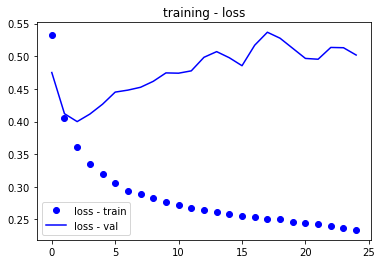

In [27]:
plot_history(history)

In [28]:
y_pred = np.round(model.predict(X_test))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.47      0.55       672
         1.0       0.84      0.92      0.88      2025

    accuracy                           0.81      2697
   macro avg       0.75      0.69      0.71      2697
weighted avg       0.79      0.81      0.80      2697



In [29]:
cohen_kappa_score(y_test, y_pred)

0.43032483231945096

In [30]:
f1_score(y_test, y_pred)

0.8774163130598774